In [1]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')

from datetime import datetime

from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot, curve_plot_accuracies


# if true: longest run will be plotted, if false: the most recent one will be plotted
take_longestRun = False

In [2]:
data_names = ["wSim_wReco_BsHc_15000_events_only3mom" ,
"wSim_wReco_XHc_15000_events_only3mom" ,
"wSim_wReco_BsX_15000_events_only3mom" , 
"wSim_wReco_BsXHc_15000_events_only3mom"  ,
"noSim_noReco_BsHc_15000_events_only3mom" ,
"noSim_noReco_XHc_15000_events_only3mom" ,
"noSim_noReco_BsX_15000_events_only3mom" , 
"noSim_noReco_BsXHc_15000_events_only3mom" ,
"wSim_wReco_BsX_15000_events[\'charge\']" ,
"wSim_wReco_BsX_15000_events_dxdydz" ,
"wSim_wReco_BsX_15000_events[\'nCDCHits\']" ,
"wSim_wReco_BsX_15000_events_hadrIDs" ,
"wSim_wReco_BsX_15000_events[\'tanlambda\']",
"wSim_wReco_BsX_15000_events[\'trackNECLClusters\']" ,
"wSim_wReco_BsX_15000_events[\'z0\']" ,
"wSim_wReco_XHc_15000_events[\'charge\']" ,
"wSim_wReco_XHc_15000_events_dxdydz" ,
"wSim_wReco_XHc_15000_events[\'nCDCHits\']" ,
"wSim_wReco_XHc_15000_events_hadrIDs" ,
"wSim_wReco_XHc_15000_events[\'tanlambda\']" ,
"wSim_wReco_XHc_15000_events[\'trackNECLClusters\']" ,
"wSim_wReco_XHc_15000_events[\'z0\']" ]
#["noSim_noReco_BsHc_15000_events" ,
#"noSim_noReco_XHc_15000_events" ,
#"noSim_noReco_BsX_15000_events" , 
#"noSim_noReco_BsXHc_15000_events"  ]
#     BsHc  XHc   BsX   BsXHc

specs = ["1024_0.001_128_0.3_8"] #"512_0.001_128_0.3_8"


In [3]:
data_names = ["wSim_wReco_XHc_15000_events" ,
"wSim_wReco_BsX_15000_events" , 
"wSim_wReco_BsX_15000_events[\'charge\']" ,
"wSim_wReco_XHc_15000_events[\'charge\']"]

In [4]:
data_names = ["fixedGlobT_wSim_wReco_BsX_15000_events_",
"fixedGlobT_wSim_wReco_XHc_15000_events_",
"fixedGlobT_wSim_wReco_BsX_15000_events_charge_pionID_kaonID",
"fixedGlobT_wSim_wReco_XHc_15000_events_charge_pionID_kaonID",
"fixedGlobT_wSim_wReco_BsX_15000_events_charge_tanlambda",
"fixedGlobT_wSim_wReco_XHc_15000_events_charge_tanlambda"]

data_name: fixedGlobT_wSim_wReco_BsX_15000_events_

 now processing: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/fixedGlobT_wSim_wReco_BsX_15000_events_/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1628242292.batchg003.desy.de.62452.0

- Done
len(tb_metrics[0]): 121
start time of run: 2021-08-06 11:38:08
most_epochs_idx: 0
latestStart_idx: 0
len(tb_metrics): 1
---------------------------- 

data_name: fixedGlobT_wSim_wReco_XHc_15000_events_

 now processing: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/fixedGlobT_wSim_wReco_XHc_15000_events_/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1628242291.batchg001.desy.de.137343.0

- Done
len(tb_metrics[0]): 121
start time of run: 2021-08-06 11:36:00
most_epochs_idx: 0
latestStart_idx: 0
len(tb_metrics): 1
---------------------------- 

data_name: fixedGlobT_wSim_wReco_BsX_15000_events_charge_pionID_kaonID

 now processing: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/fixedGlobT_

/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks/plot_fcts.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,5))


---------------------------- 

data_name: fixedGlobT_wSim_wReco_XHc_15000_events_charge_tanlambda

 now processing: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/fixedGlobT_wSim_wReco_XHc_15000_events_charge_tanlambda/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1628242497.batchg008.desy.de.26136.0

- Done
len(tb_metrics[0]): 121
start time of run: 2021-08-06 11:40:16
most_epochs_idx: 0
latestStart_idx: 0
len(tb_metrics): 1
---------------------------- 



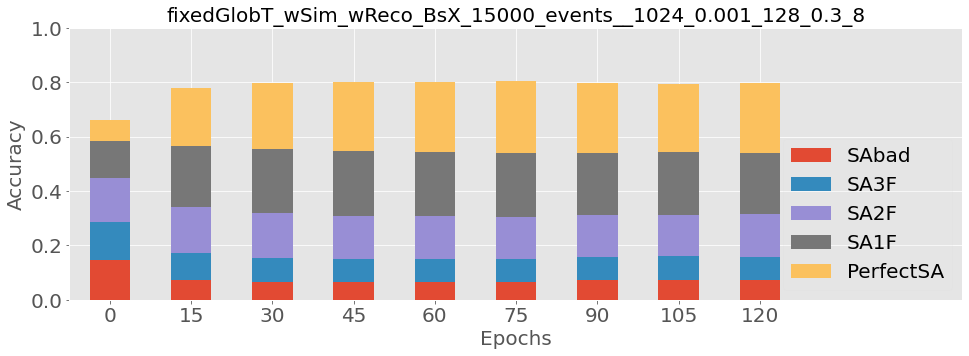

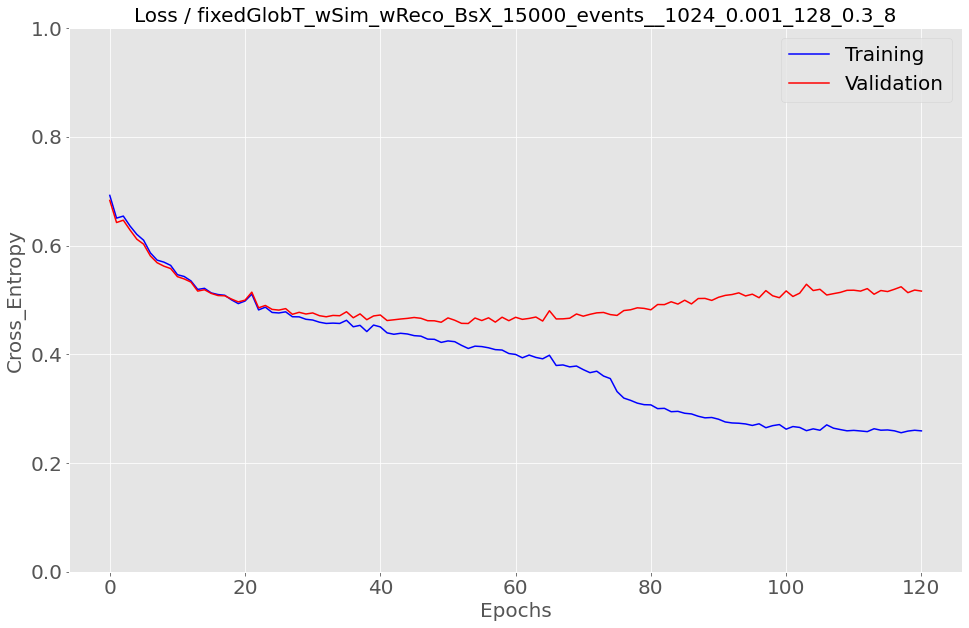

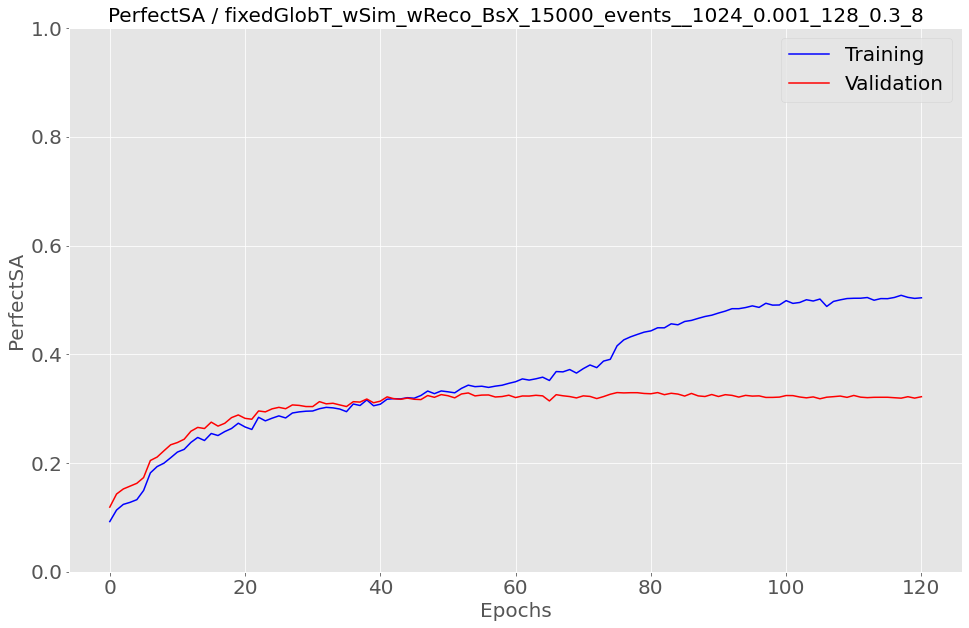

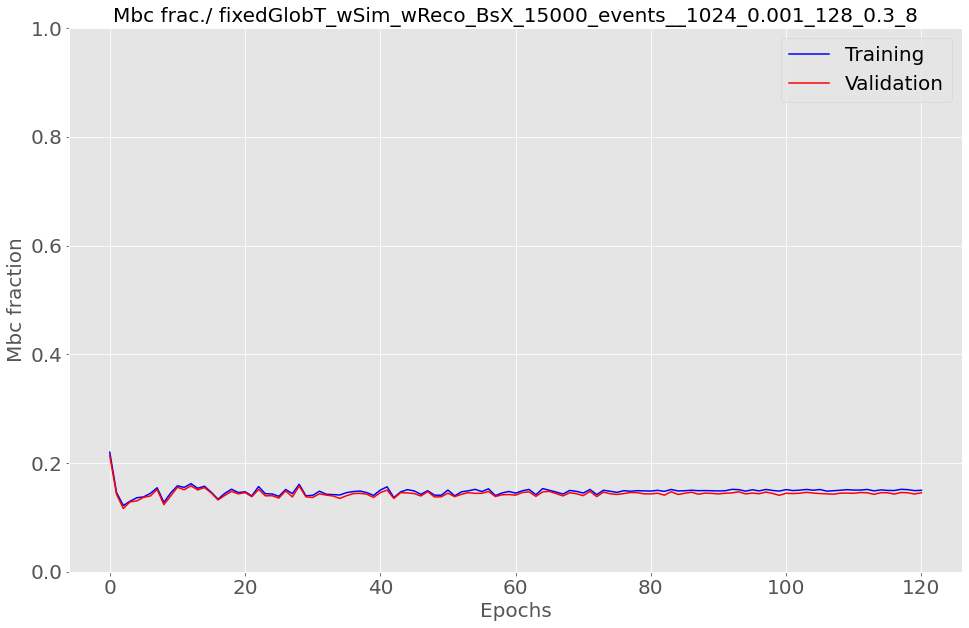

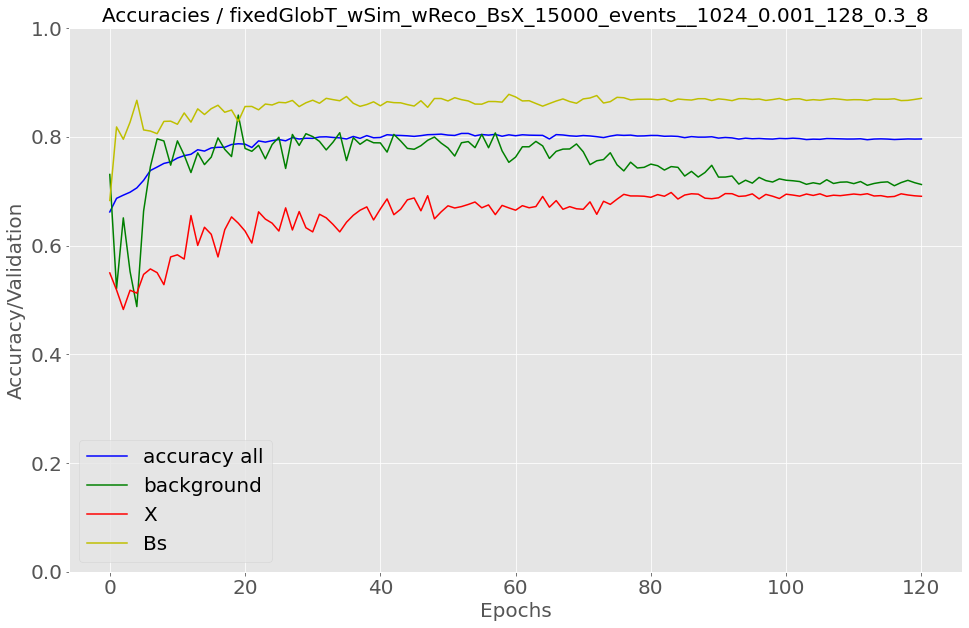

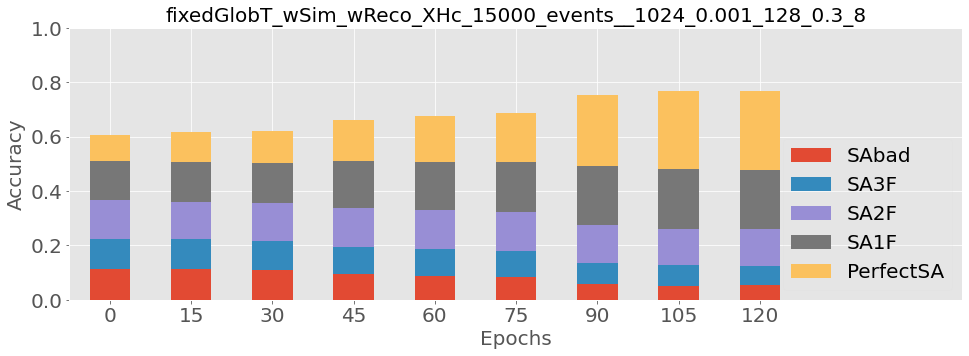

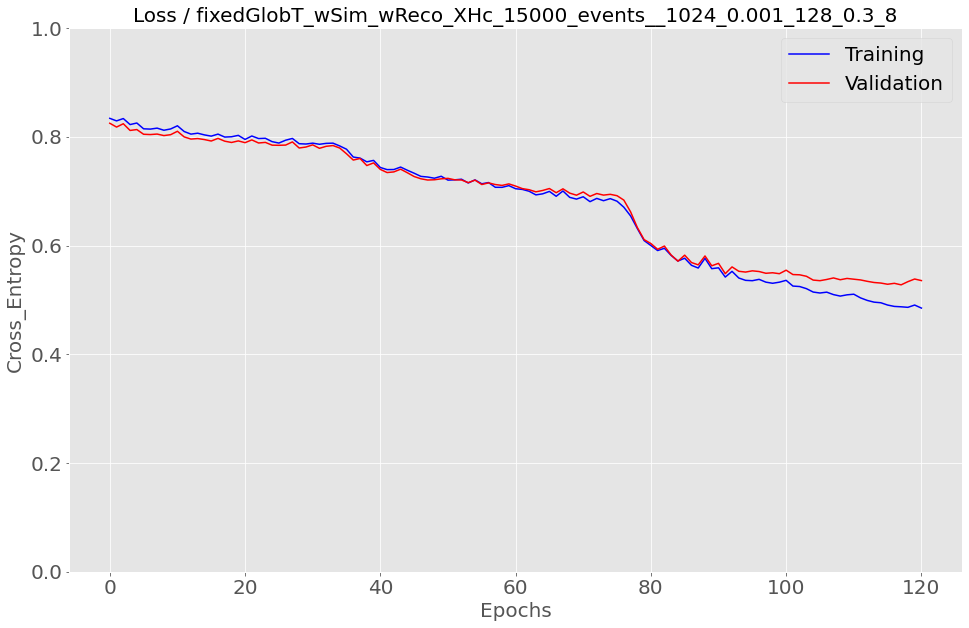

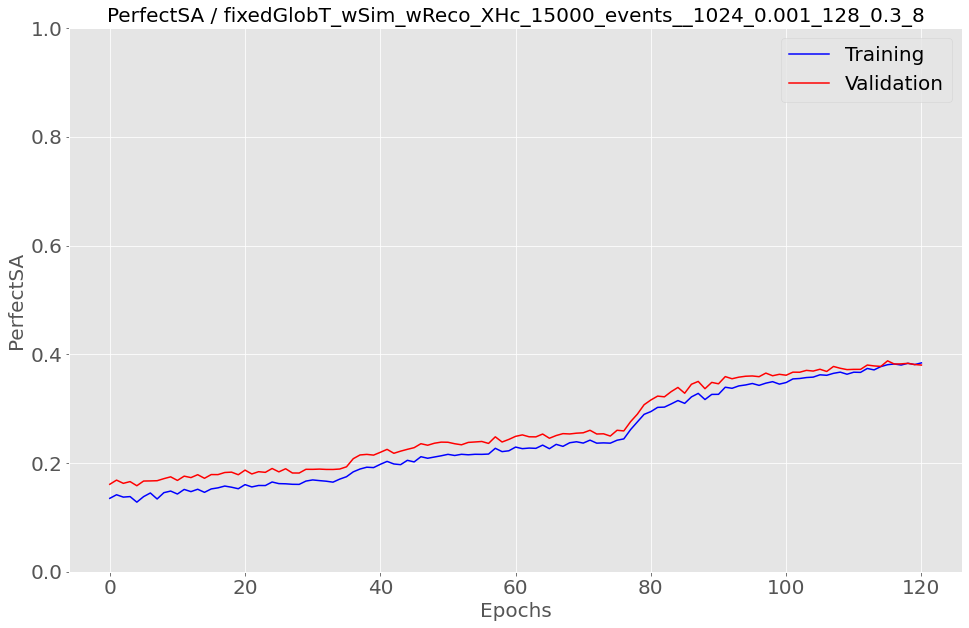

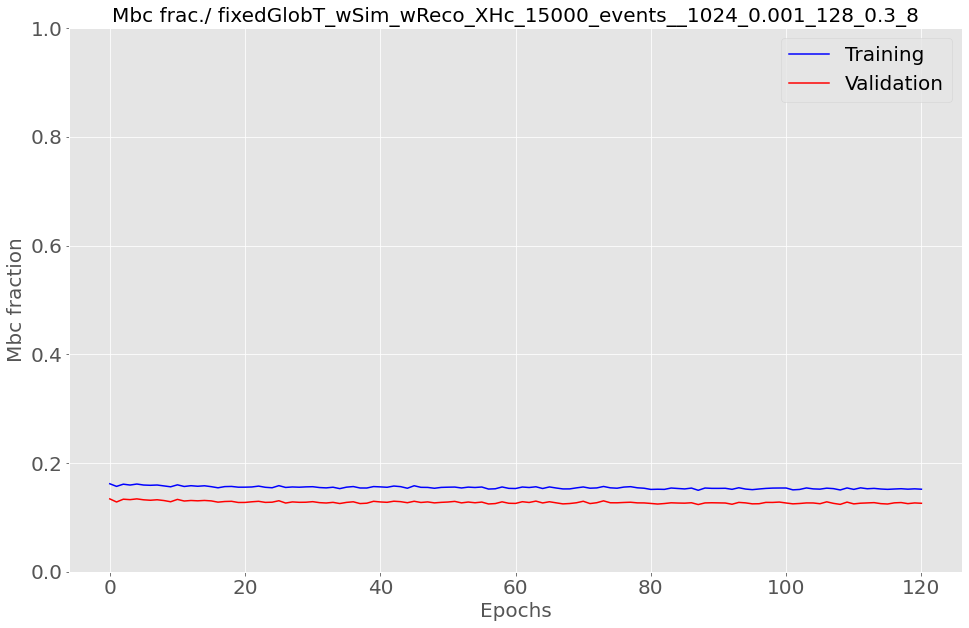

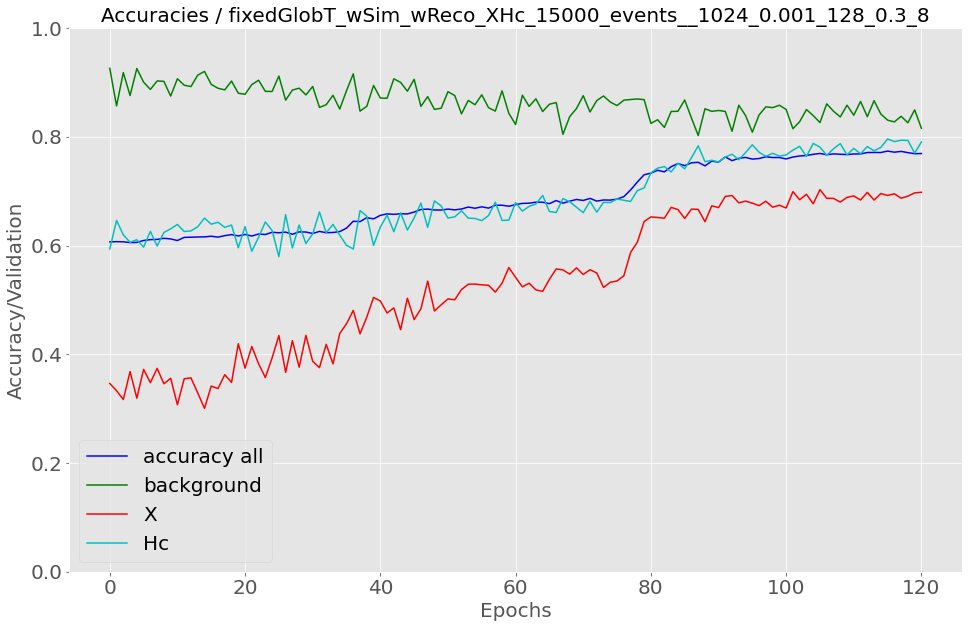

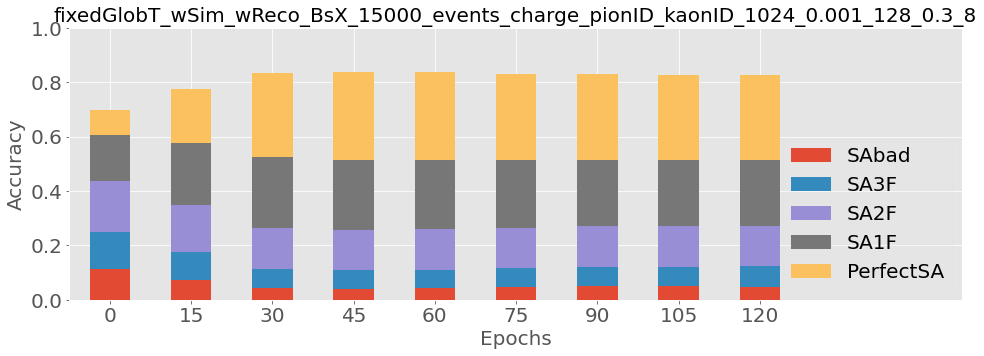

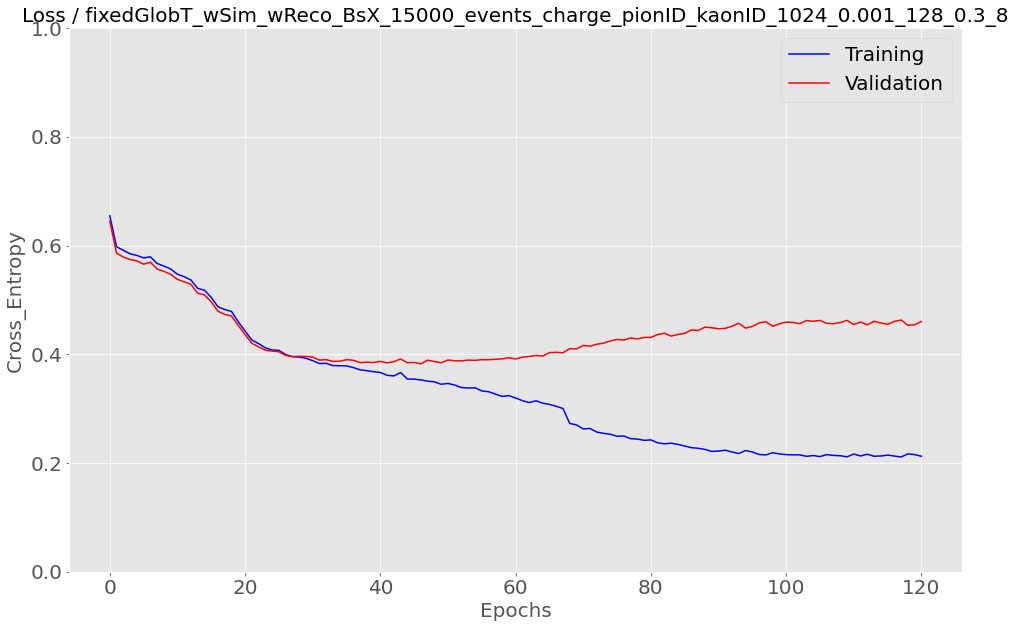

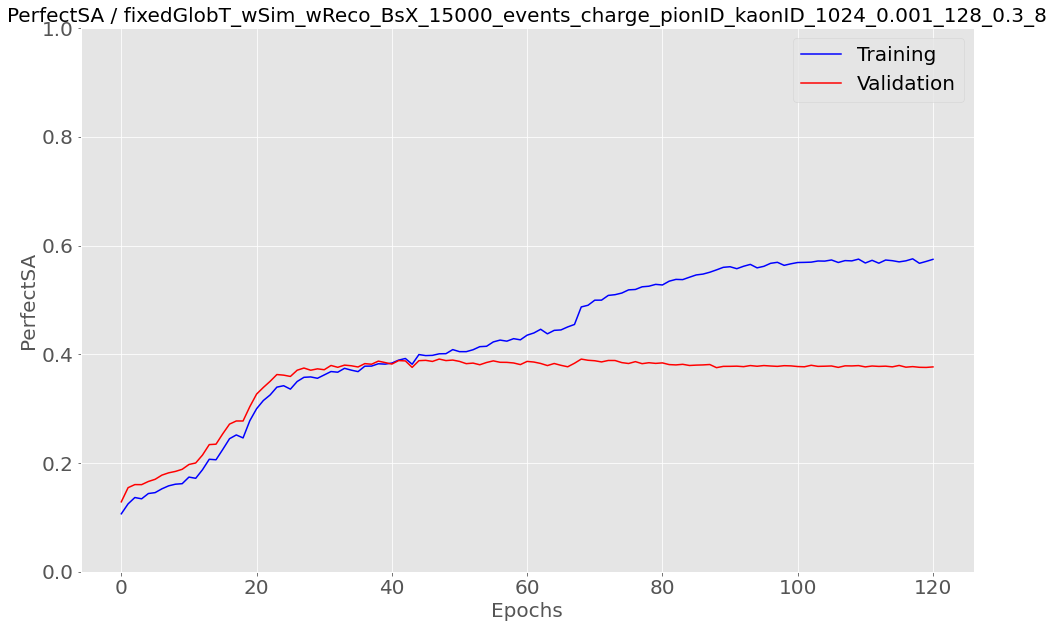

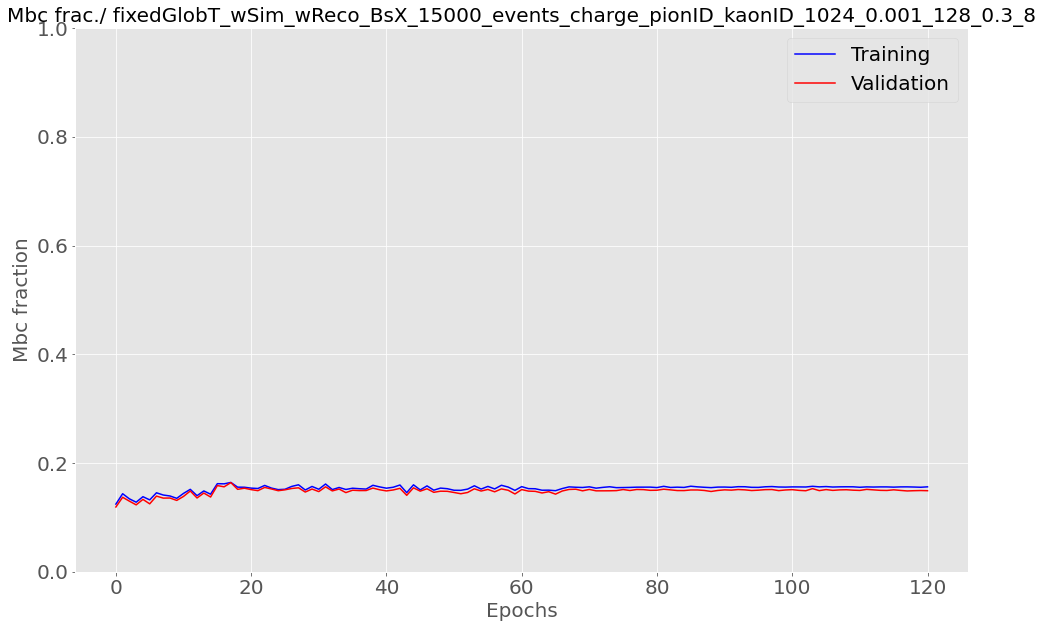

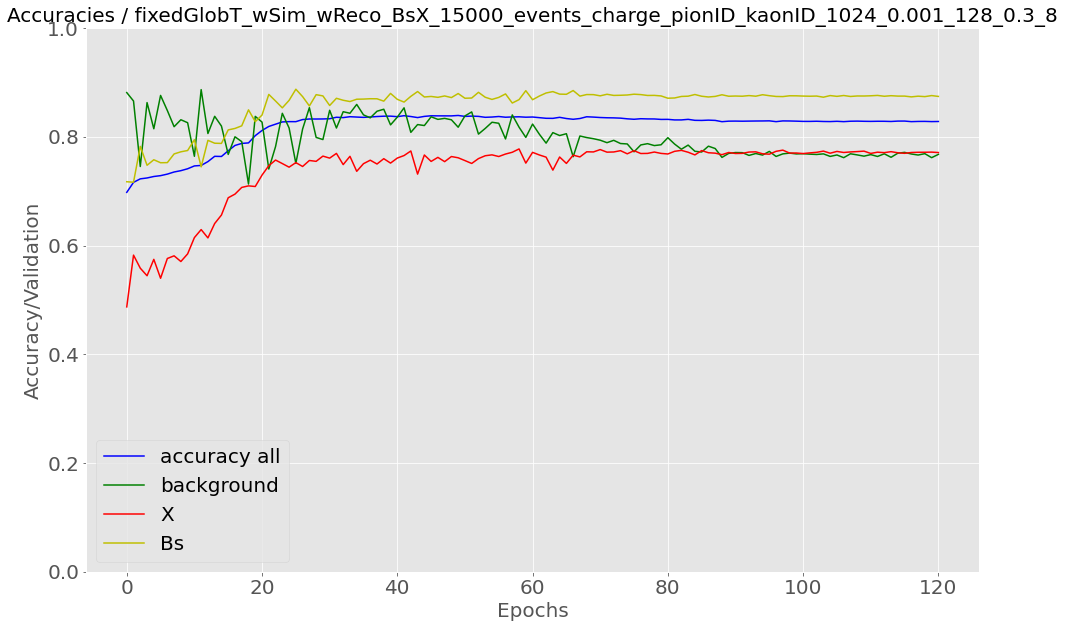

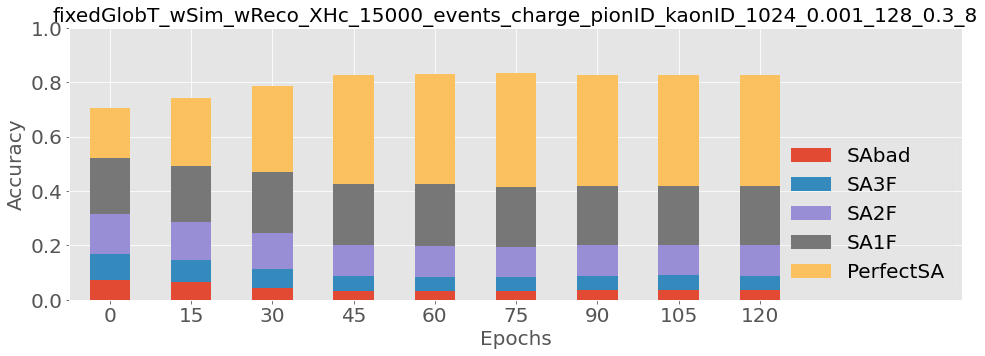

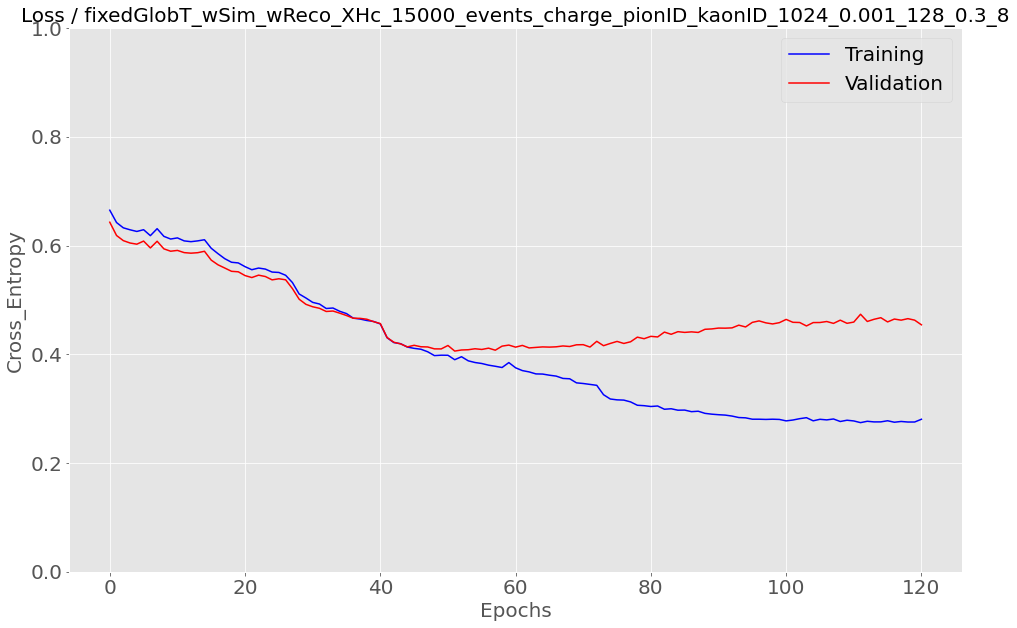

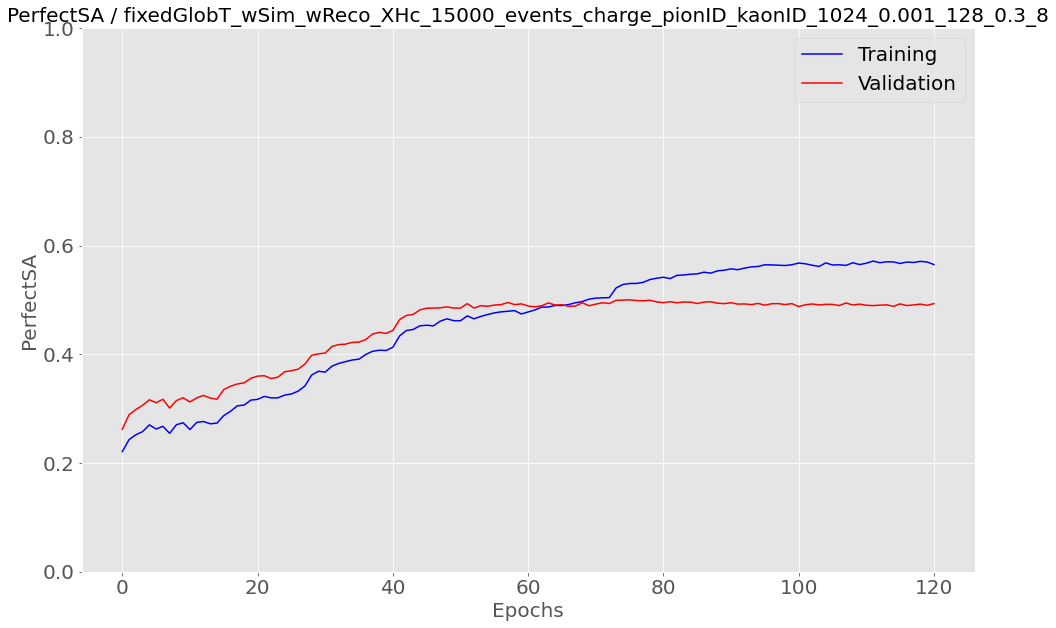

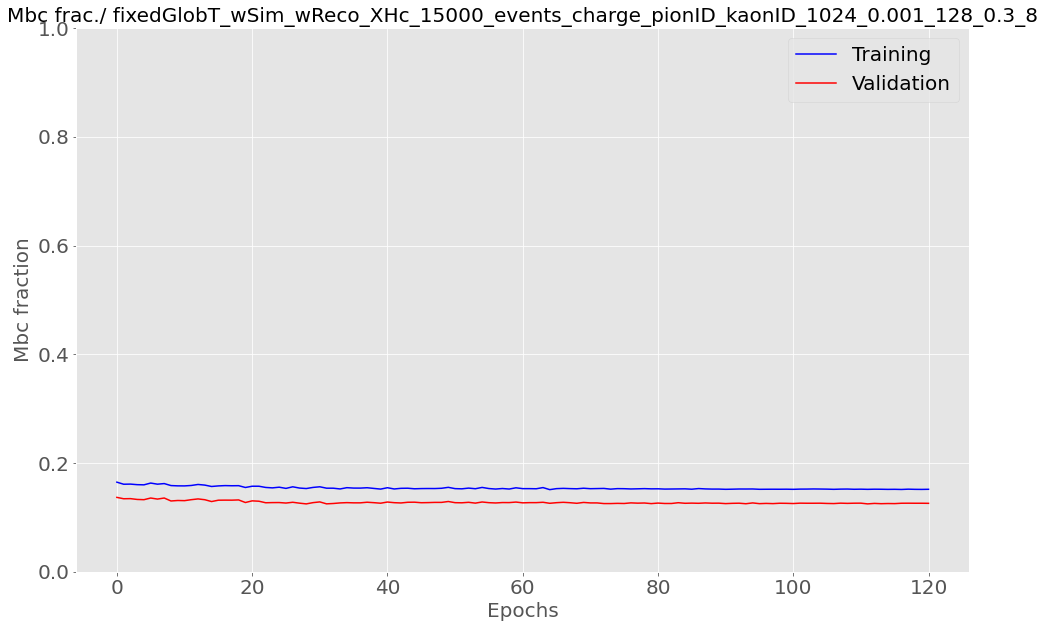

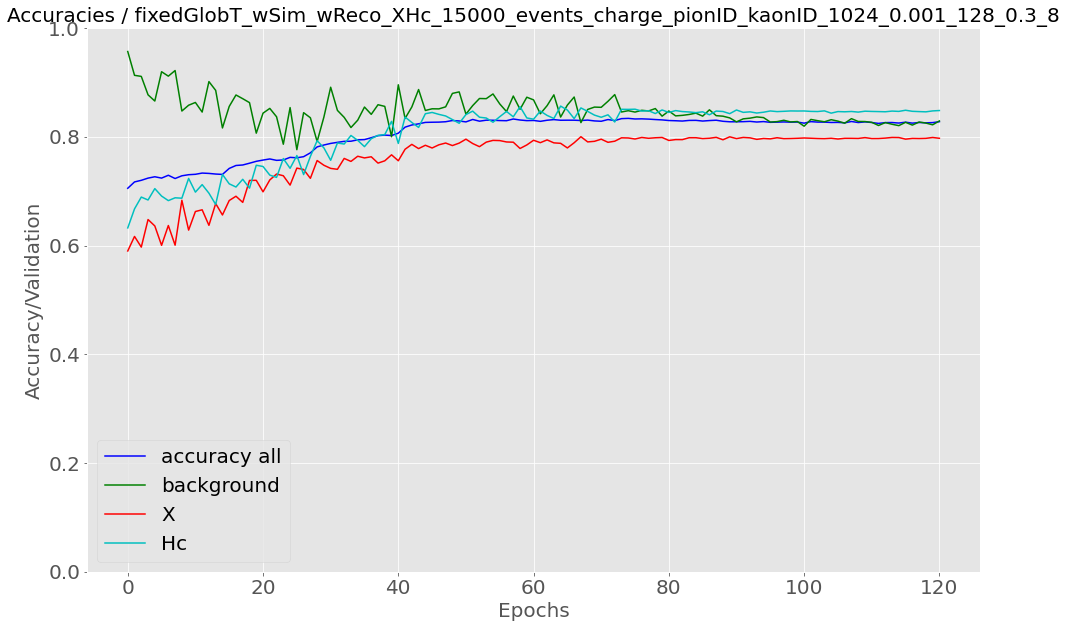

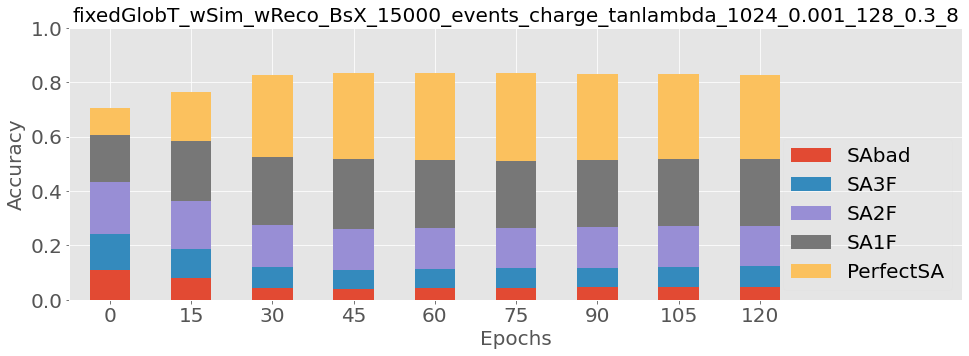

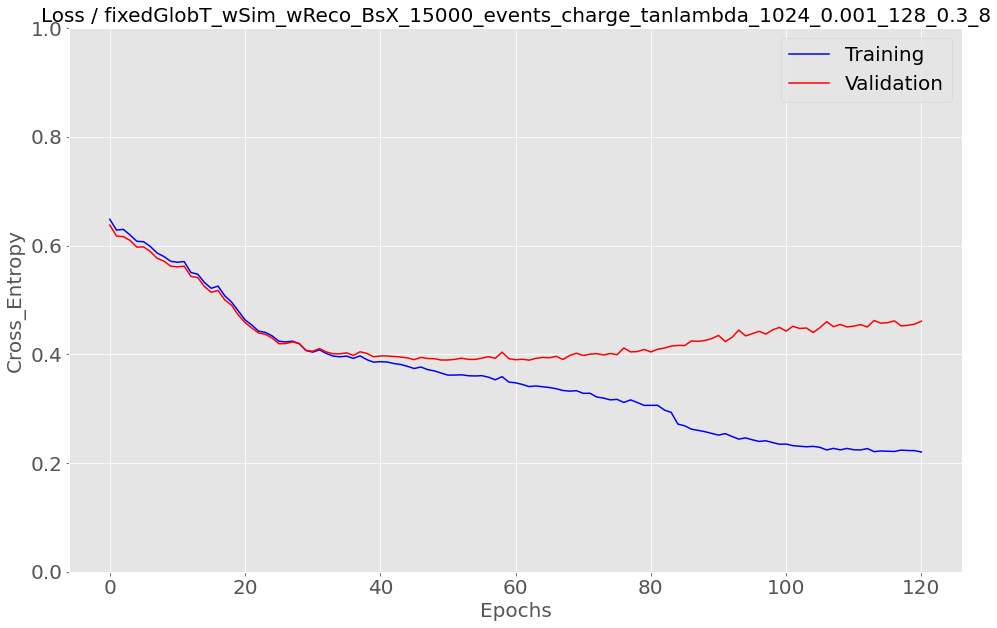

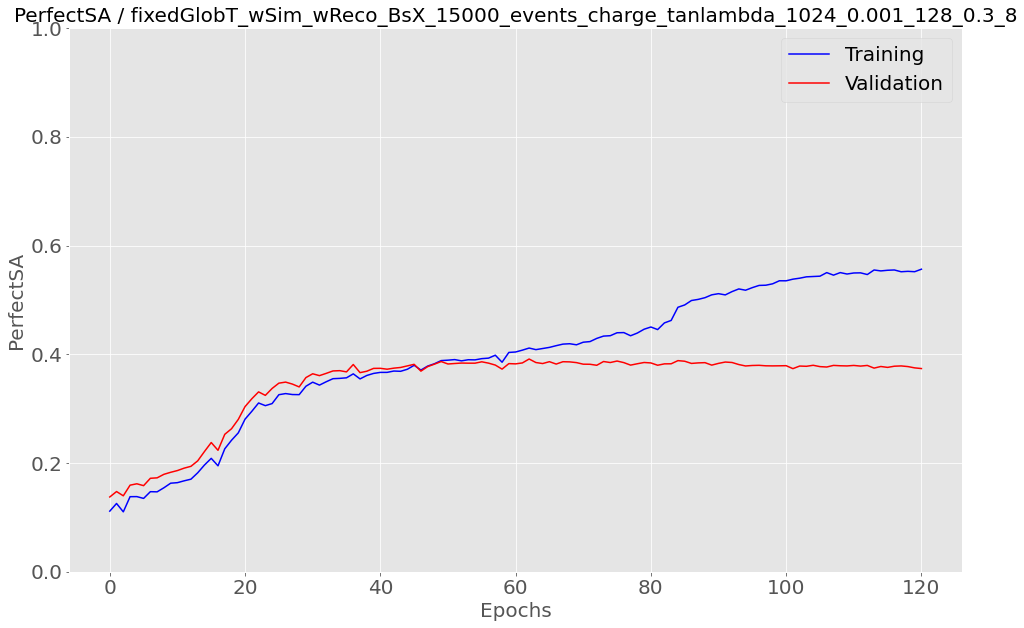

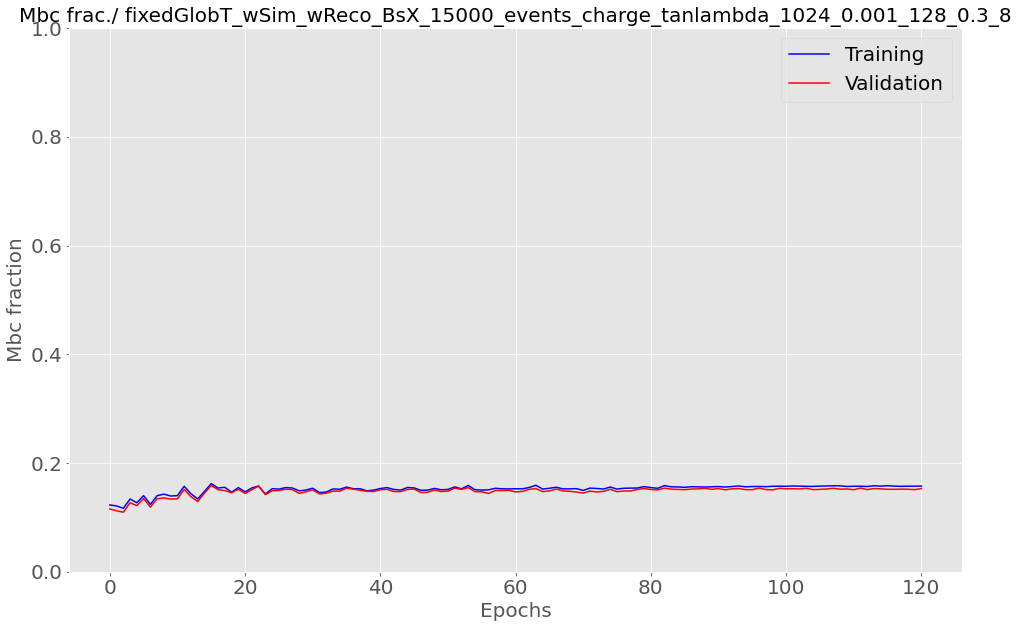

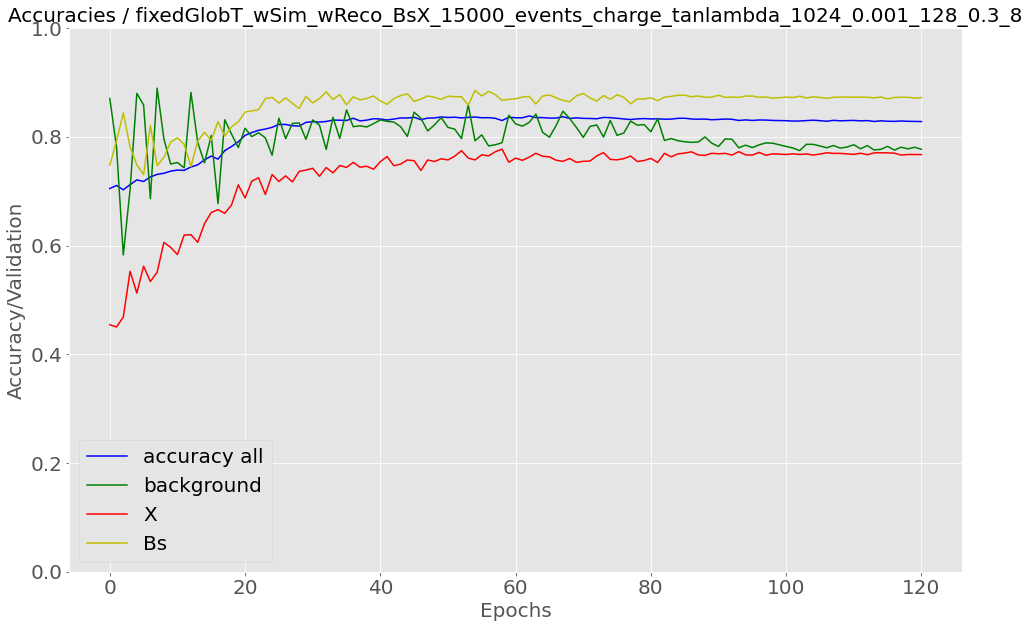

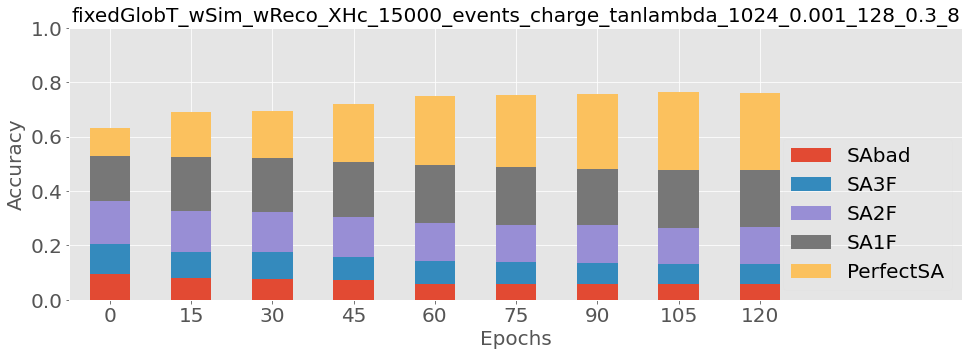

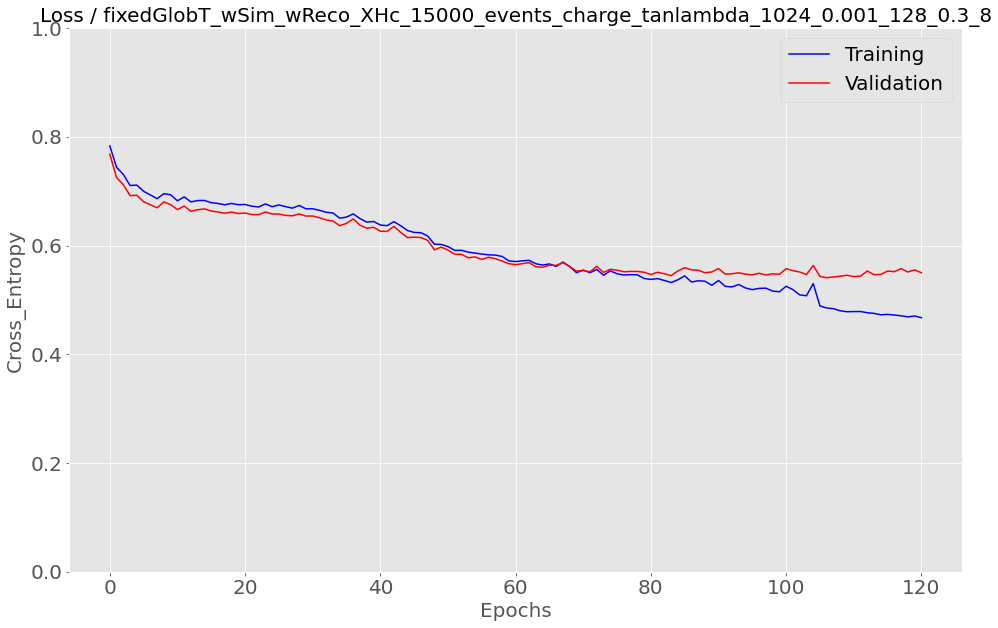

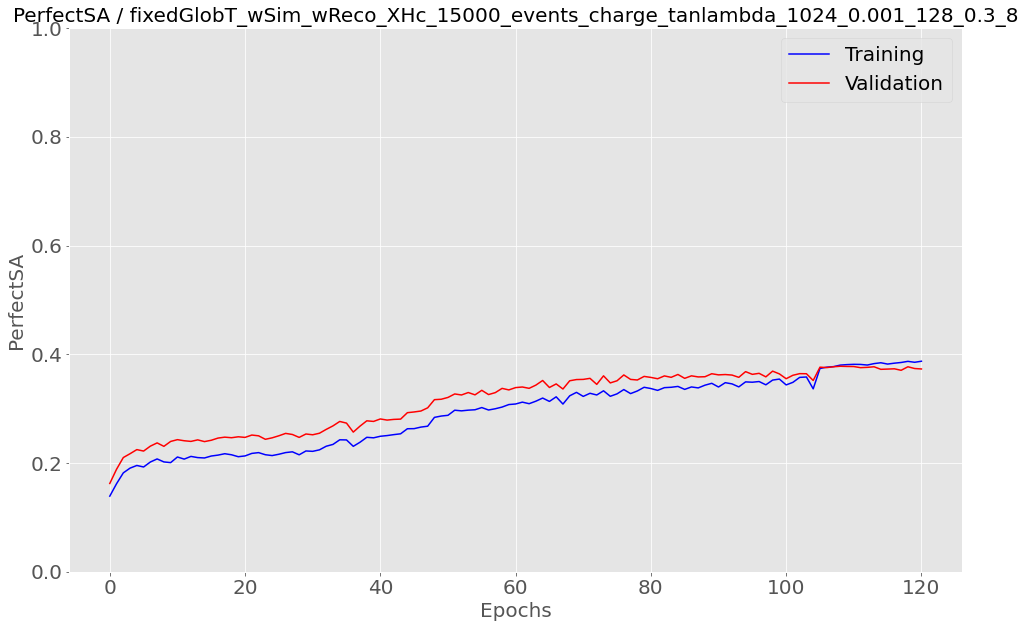

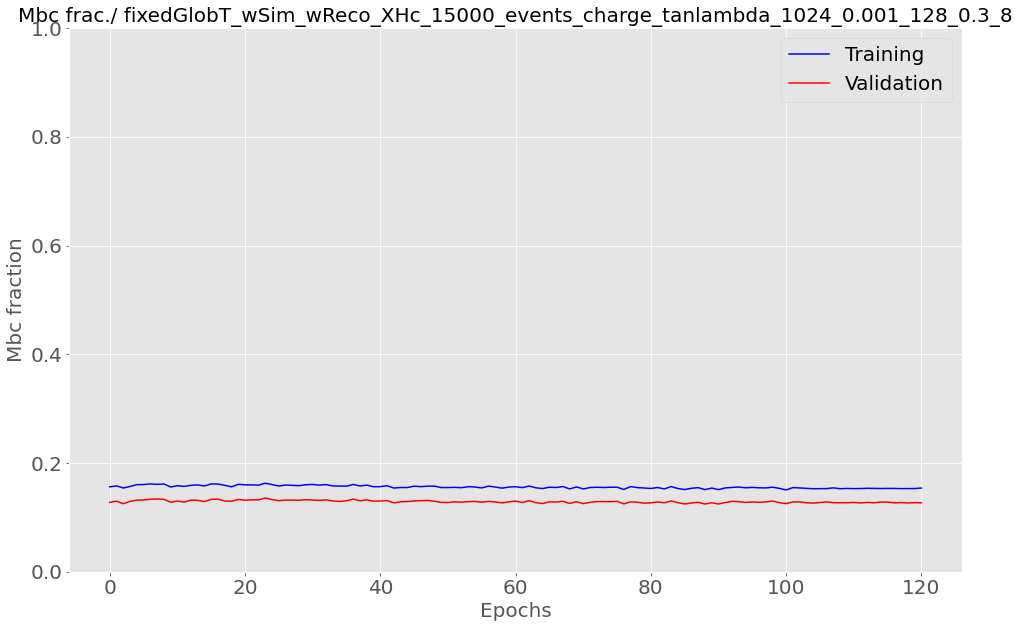

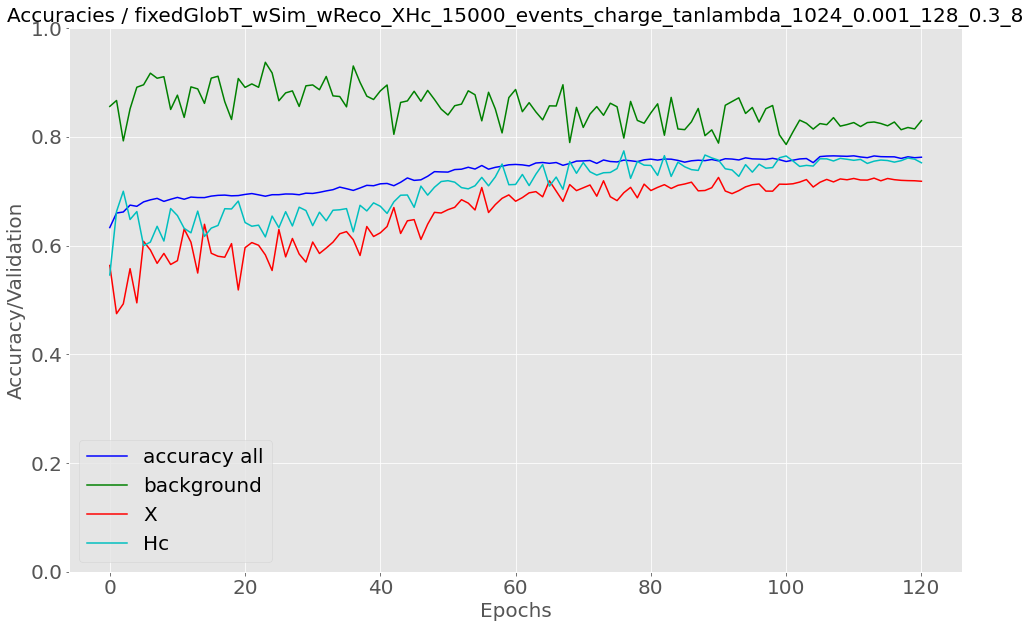

In [5]:
plotted_specs=[]
names = []
max_perfSA = []
for data_name in data_names:
    for spec in specs:
        plotname_extension = data_name + '_' + spec
        nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/"

        plot_path = "/afs/desy.de/user/a/axelheim/private/MC_studies/my6modes/"
        
        print("data_name:",data_name)
        data_dir = Path((nfs_path + 'tb_logs/' + data_name + '/' + spec))
        #data_dir = ((nfs_path + 'tb_logs/' + data_name + '/' + spec))
        print("\n now processing:",data_dir)
        #if not data_dir.is_dir():
        #    print("dir not found in: ", data_dir, "\n skip dir")
        #    continue
        
        
        csv_dir = Path((nfs_path + 'tb_csv/' + data_name + '/' + spec))
        csv_dir.mkdir(parents=True, exist_ok=True)

        plot_path = Path((plot_path + 'plots/' + data_name + '/' + spec))
        plot_path.mkdir(parents=True, exist_ok=True)

        tb_metrics = tabulate_metrics(data_dir, csv_dir)

        
        # choosing the tb_log with the most epochs recorded
        epochs = []
        starttime = []
        for i in range(len(tb_metrics)):
            epochs.append(len(tb_metrics[i]))
            starttime.append(tb_metrics[i]["Time/secs"][0])
            print("len(tb_metrics[{}]):".format(i),len(tb_metrics[i]))
            print("start time of run:",datetime.fromtimestamp(tb_metrics[i]["Time/secs"][0]))
        most_epochs_idx = 0
        latestStart_idx = 0
        if len(tb_metrics) > 1:
            most_epochs_idx = epochs.index(max(epochs))
            latestStart_idx = starttime.index(max(starttime))
            #most_epochs_idx = epochs.index(min(epochs))
        
        print("most_epochs_idx:",most_epochs_idx)
        print("latestStart_idx:",latestStart_idx)
        print("len(tb_metrics):",len(tb_metrics))
        if len(tb_metrics) < 1:
            continue
        
        if take_longestRun == True:
            longest_run = tb_metrics[most_epochs_idx]
        else:
            longest_run = tb_metrics[latestStart_idx]
        
        # the actual plots
        # bar plot
        steps = math.ceil(len(longest_run)/10)
        steps = int(math.ceil(steps / 5.0)) * 5
        multi_metric_bar_plot(longest_run, plot_path, ('barplot_metrics_' + plotname_extension), data_type="Validation", step=steps, metric_type="SA", title=plotname_extension)
        
        
        # loss plot
        loss_tr = longest_run['Cross Entropy/Training']
        loss_val = longest_run['Cross Entropy/Validation']
        curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + plotname_extension), 'Cross_Entropy', ('Loss / ' + plotname_extension))

        # perfect SA plot
        pLCA_tr = longest_run['PerfectSA/Training']
        pLCA_val = longest_run['PerfectSA/Validation']
        curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + plotname_extension), 'PerfectSA', ('PerfectSA / ' + plotname_extension))
        names.append(plotname_extension)
        max_perfSA.append(pLCA_val.max())
        
        # M_bc plot
        Mbc_tr = longest_run["Mbc Peak Fraction/Training"]
        Mbc_val = longest_run["Mbc Peak Fraction/Validation"]
        curve_plot(Mbc_tr, Mbc_val, plot_path, ('Mbc_comparison_' + plotname_extension), 'Mbc fraction', ('Mbc frac./ ' + plotname_extension))
        
        
        
        # plot accuracies
        acc_all = longest_run["Accuracy/Validation"]
        acc_bg = longest_run["AccClass0/Validation"]
    
        # case BsXHc
        acc_X = longest_run["AccClass1/Validation"]
        acc_Bs = longest_run["AccClass2/Validation"]
        acc_Hc = longest_run["AccClass3/Validation"]
        
        # case BsX
        if data_name.find("BsX") != -1 and data_name.find("Hc") == -1:
            acc_Hc = None
            
        # case XHc
        if data_name.find("XHc") != -1 and data_name.find("Bs") == -1:
            acc_Bs = None
            acc_Hc = longest_run["AccClass2/Validation"]  
            
        # case BsHc
        if data_name.find("BsHc") != -1:
            acc_X = None
            acc_Hc = longest_run["AccClass1/Validation"]
            
        
                
        
        curve_plot_accuracies(plot_path, ('accuracies_comparison_' + plotname_extension), 'Accuracy/Validation',
                              ('Accuracies / ' + plotname_extension),
                             acc_all=acc_all, acc_bg=acc_bg, acc_X=acc_X, acc_Bs=acc_Bs, acc_Hc=acc_Hc)
        
        
        plotted_specs.append(data_name + '///' + spec)
        print("---------------------------- \n")



In [12]:
for i in range(len(names)):
    print("data&specs:", names[i], "scored perfect SA:", round(max_perfSA[i],5))


data&specs: fixedGlobT_wSim_wReco_BsX_15000_events__1024_0.001_128_0.3_8 scored perfect SA: 0.32969
data&specs: fixedGlobT_wSim_wReco_XHc_15000_events__1024_0.001_128_0.3_8 scored perfect SA: 0.3881
data&specs: fixedGlobT_wSim_wReco_BsX_15000_events_charge_pionID_kaonID_1024_0.001_128_0.3_8 scored perfect SA: 0.39137
data&specs: fixedGlobT_wSim_wReco_XHc_15000_events_charge_pionID_kaonID_1024_0.001_128_0.3_8 scored perfect SA: 0.5003
data&specs: fixedGlobT_wSim_wReco_BsX_15000_events_charge_tanlambda_1024_0.001_128_0.3_8 scored perfect SA: 0.39144
data&specs: fixedGlobT_wSim_wReco_XHc_15000_events_charge_tanlambda_1024_0.001_128_0.3_8 scored perfect SA: 0.37813


In [7]:
for i in range(len(plotted_specs)):
    print(plotted_specs[i])

wSim_wReco_XHc_15000_events///1024_0.001_128_0.3_8
wSim_wReco_BsX_15000_events///1024_0.001_128_0.3_8
wSim_wReco_BsX_15000_events['charge']///1024_0.001_128_0.3_8
wSim_wReco_XHc_15000_events['charge']///1024_0.001_128_0.3_8


<AxesSubplot:>

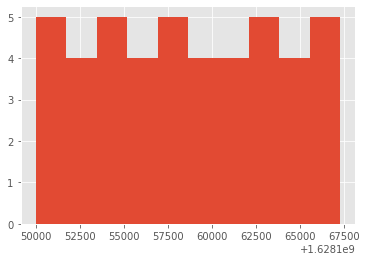

In [17]:
longest_run["Time/secs"].hist()

In [13]:
int(True)

1